<a href="https://colab.research.google.com/github/wyewlee/mlass/blob/main/Copy_of_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

The dataset has 23 columns with 12982 rows.



1. Date           
The date of observation

2. Location       
The common name of the location of the weather station

3. MinTemp        
The minimum temperature in degrees celsius

4. MaxTemp        
The maximum temperature in degrees celsius

5. Rainfall       
The amount of rainfall recorded for the day in mm

6. Evaporation    
The so-called Class A pan evaporation (mm) in the 24 hours to 9am

7. Sunshine       
The number of hours of bright sunshine in the day.

8. WindGustDir     
The direction of the strongest wind gust in the 24 hours to midnight
 
9. WindGustSpeed  
The speed (km/h) of the strongest wind gust in the 24 hours to midnight

10. WindDir9am     
Direction of the wind at 9am

11. WindDir3pm     
Direction of the wind at 3pm

12. WindSpeed9am   
Wind speed (km/hr) averaged over 10 minutes prior to 9am

13. WindSpeed3pm   
Wind speed (km/hr) averaged over 10 minutes prior to 3pm

14. Humidity9am    
Humidity (percent) at 9am

15. Humidity3pm    
Humidity (percent) at 3pm

16. Pressure9am    
Atmospheric pressure (hpa) reduced to mean sea level at 9am

17. Pressure3pm    
Atmospheric pressure (hpa) reduced to mean sea level at 3pm
 
18. Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
 
19. Cloud3pm       
Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

20. Temp9am        
Temperature (degrees C) at 9am

21. Temp3pm        
Temperature (degrees C) at 3pm

22. RainToday      
Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 

23. RainTomorrow   
The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk". 



## Import Libraries and Dataset

In [116]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2021-04-17 23:30:48 +08:00)


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('a.csv')

time: 47 ms (started: 2021-04-17 23:30:48 +08:00)


## Exploratory Data Analysis

In [118]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/1/2009,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,37.0,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,No,No
1,1/2/2009,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,37.0,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,No,No
2,1/3/2009,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,43.0,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,No,No
3,1/4/2009,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,46.0,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,No,No
4,1/5/2009,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,23.0,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,No,No


time: 31 ms (started: 2021-04-17 23:30:48 +08:00)


In [119]:
data.shape

(12982, 23)

time: 0 ns (started: 2021-04-17 23:30:48 +08:00)


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12982 entries, 0 to 12981
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12982 non-null  object 
 1   Location       12982 non-null  object 
 2   MinTemp        12492 non-null  float64
 3   MaxTemp        12496 non-null  float64
 4   Rainfall       12166 non-null  float64
 5   Evaporation    11186 non-null  float64
 6   Sunshine       10616 non-null  float64
 7   WindGustDir    11563 non-null  object 
 8   WindGustSpeed  11565 non-null  float64
 9   WindDir9am     12216 non-null  object 
 10  WindDir3pm     12694 non-null  object 
 11  WindSpeed9am   12725 non-null  float64
 12  WindSpeed3pm   12733 non-null  float64
 13  Humidity9am    12419 non-null  float64
 14  Humidity3pm    12470 non-null  float64
 15  Pressure9am    12255 non-null  float64
 16  Pressure3pm    12259 non-null  float64
 17  Cloud9am       10085 non-null  float64
 18  Cloud3

In [121]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

time: 0 ns (started: 2021-04-17 23:30:48 +08:00)


In [122]:
data.nunique()

Date             3436
Location            4
MinTemp           341
MaxTemp           370
Rainfall          260
Evaporation       147
Sunshine          142
WindGustDir        16
WindGustSpeed      55
WindDir9am         16
WindDir3pm         16
WindSpeed9am       37
WindSpeed3pm       36
Humidity9am        87
Humidity3pm       100
Pressure9am       441
Pressure3pm       440
Cloud9am           10
Cloud3pm            9
Temp9am           348
Temp3pm           372
RainToday           2
RainTomorrow        2
dtype: int64

time: 16 ms (started: 2021-04-17 23:30:48 +08:00)


In [123]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,12492.000000,12496.000000,12166.000000,11186.000000,10616.000000,11565.000000,12725.000000,12733.000000,12419.000000,12470.000000,12255.000000,12259.000000,10085.000000,9877.000000,12478.000000,12487.000000
mean,10.722799,21.968214,2.193786,4.903549,7.219621,41.045828,14.390570,19.236472,69.343023,48.575060,1018.395945,1015.983522,4.494993,4.572542,15.013119,20.527541
std,6.302727,6.554904,7.096515,3.389818,3.894060,14.583387,9.338961,8.936211,16.049204,18.545674,7.358022,7.172440,2.855661,2.635960,5.963419,6.374995
min,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,9.000000,1.000000,986.700000,984.200000,0.000000,0.000000,-1.300000,3.700000
25%,6.700000,16.900000,0.000000,2.400000,4.100000,31.000000,7.000000,13.000000,59.000000,35.000000,1013.500000,1011.100000,1.000000,2.000000,10.700000,15.700000
50%,10.900000,21.400000,0.000000,4.100000,8.000000,39.000000,13.000000,19.000000,70.000000,48.000000,1018.500000,1016.100000,5.000000,5.000000,14.900000,20.000000
75%,15.300000,26.300000,0.600000,6.800000,10.300000,50.000000,20.000000,24.000000,81.000000,60.000000,1023.400000,1020.900000,7.000000,7.000000,19.300000,24.800000
max,28.600000,46.400000,119.400000,39.400000,14.100000,122.000000,67.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,36.500000,45.400000


time: 62 ms (started: 2021-04-17 23:30:48 +08:00)


### Exploring Categorical Variables

In [124]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
time: 0 ns (started: 2021-04-17 23:30:48 +08:00)


In [125]:
data[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,1/1/2009,WaggaWagga,WNW,NW,W,No,No
1,1/2/2009,WaggaWagga,WSW,SW,SW,No,No
2,1/3/2009,WaggaWagga,NE,ENE,NNE,No,No
3,1/4/2009,WaggaWagga,N,NE,NW,No,No
4,1/5/2009,WaggaWagga,W,NNE,SW,No,No


time: 16 ms (started: 2021-04-17 23:30:48 +08:00)


**Cardinality**

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [126]:
categorical = [var for var in data.columns if data[var].dtype=='O']

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  4  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels
time: 0 ns (started: 2021-04-17 23:30:48 +08:00)


**Summary of categorical variables**
- There is a date variable - 'Date'.
- There are two binary categorical variables - 'RainToday' and 'RainTomorrow'.
- The target variable is 'RainTomorrow'.
- All categorical variables need to be transformed.

**Feature Engineering of Date**

In [127]:
from datetime import datetime

data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,1003.5,1.0,1.0,20.8,27.0,No,No,1,1,2009
1,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,1012.9,1.0,0.0,14.7,23.2,No,No,2,1,2009
2,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,1014.3,0.0,1.0,18.9,28.0,No,No,3,1,2009
3,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,1010.6,1.0,4.0,24.7,33.7,No,No,4,1,2009
4,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,1009.8,1.0,1.0,23.6,34.6,No,No,5,1,2009


time: 1.55 s (started: 2021-04-17 23:30:48 +08:00)


In [128]:
data  = data.drop(["Date"],axis=1)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,W,...,1003.5,1.0,1.0,20.8,27.0,No,No,1,1,2009
1,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,SW,...,1012.9,1.0,0.0,14.7,23.2,No,No,2,1,2009
2,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,NNE,...,1014.3,0.0,1.0,18.9,28.0,No,No,3,1,2009
3,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,NW,...,1010.6,1.0,4.0,24.7,33.7,No,No,4,1,2009
4,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,SW,...,1009.8,1.0,1.0,23.6,34.6,No,No,5,1,2009


time: 32 ms (started: 2021-04-17 23:30:50 +08:00)


In [129]:
#update categorical variable list
categorical = [var for var in data.columns if data[var].dtype=='O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

time: 0 ns (started: 2021-04-17 23:30:50 +08:00)


### Exploring Numerical Variables

In [130]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']
time: 0 ns (started: 2021-04-17 23:30:50 +08:00)


In [131]:
data[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,9.9,28.4,0.0,9.8,13.5,59.0,7.0,35.0,37.0,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,1,1,2009
1,8.9,25.3,0.0,14.8,13.7,48.0,22.0,28.0,37.0,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,2,1,2009
2,11.0,30.7,0.0,9.8,13.7,39.0,26.0,9.0,43.0,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,3,1,2009
3,14.7,35.2,0.0,9.4,12.1,39.0,17.0,13.0,46.0,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,4,1,2009
4,11.8,36.5,0.0,11.6,13.4,43.0,7.0,19.0,23.0,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,5,1,2009


time: 32 ms (started: 2021-04-17 23:30:50 +08:00)


**Summary of numerical variables**
- All of the numerical variables are of continuous type.

In [132]:
# view summary statistics in numerical variables

print(round(data[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  12492.0  12496.0   12166.0      11186.0   10616.0        11565.0   
mean      11.0     22.0       2.0          5.0       7.0           41.0   
std        6.0      7.0       7.0          3.0       4.0           15.0   
min       -8.0      4.0       0.0          0.0       0.0           11.0   
25%        7.0     17.0       0.0          2.0       4.0           31.0   
50%       11.0     21.0       0.0          4.0       8.0           39.0   
75%       15.0     26.0       1.0          7.0      10.0           50.0   
max       29.0     46.0     119.0         39.0      14.0          122.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       12725.0       12733.0      12419.0      12470.0      12255.0   
mean           14.0          19.0         69.0         49.0       1018.0   
std             9.0           9.0         16.0         19.0          7.0   
min             0.0 

Rainfall outliers are values < -1.7999999999999998 or > 2.4
Evaporation outliers are values < -10.8 or > 20.0
WindSpeed9am outliers are values < -32.0 or > 59.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


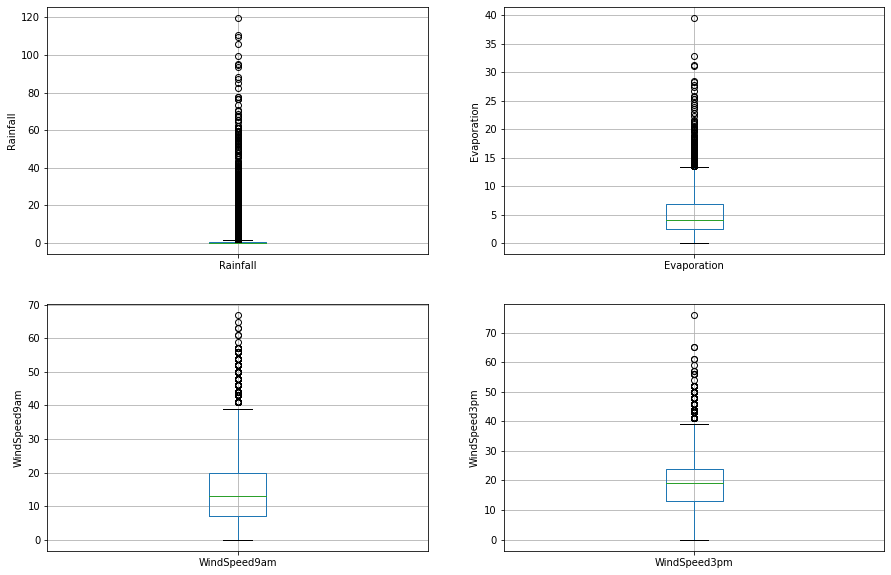

time: 797 ms (started: 2021-04-17 23:30:50 +08:00)


In [133]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

# find outliers for Rainfall variable

IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for Evaporation variable

IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed9am variable

IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed3pm variable

IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Sunshine outliers are values < -14.500000000000002 or > 28.900000000000002
MinTemp outliers are values < -19.100000000000005 or > 41.10000000000001
MaxTemp outliers are values < -11.300000000000008 or > 54.50000000000001


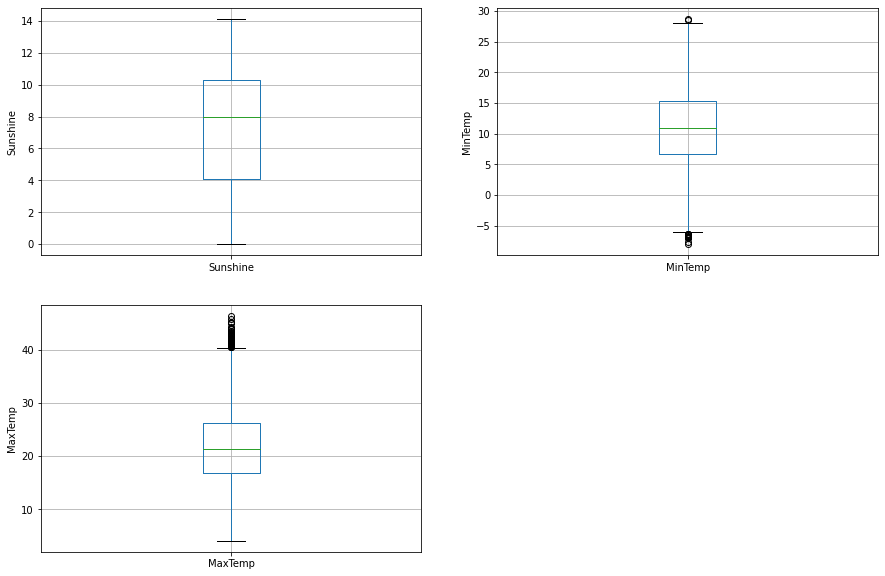

time: 531 ms (started: 2021-04-17 23:30:51 +08:00)


In [134]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Sunshine')
fig.set_title('')
fig.set_ylabel('Sunshine')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

# find outliers for Sunshine variable

IQR = data.Sunshine.quantile(0.75) - data.Sunshine.quantile(0.25)
Lower_fence = data.Sunshine.quantile(0.25) - (IQR * 3)
Upper_fence = data.Sunshine.quantile(0.75) + (IQR * 3)
print('Sunshine outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for MinTemp variable

IQR = data.MinTemp.quantile(0.75) - data.MinTemp.quantile(0.25)
Lower_fence = data.MinTemp.quantile(0.25) - (IQR * 3)
Upper_fence = data.MinTemp.quantile(0.75) + (IQR * 3)
print('MinTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for MaxTemp variable

IQR = data.MaxTemp.quantile(0.75) - data.MaxTemp.quantile(0.25)
Lower_fence = data.MaxTemp.quantile(0.25) - (IQR * 3)
Upper_fence = data.MaxTemp.quantile(0.75) + (IQR * 3)
print('MaxTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Text(0, 0.5, 'RainTomorrow')

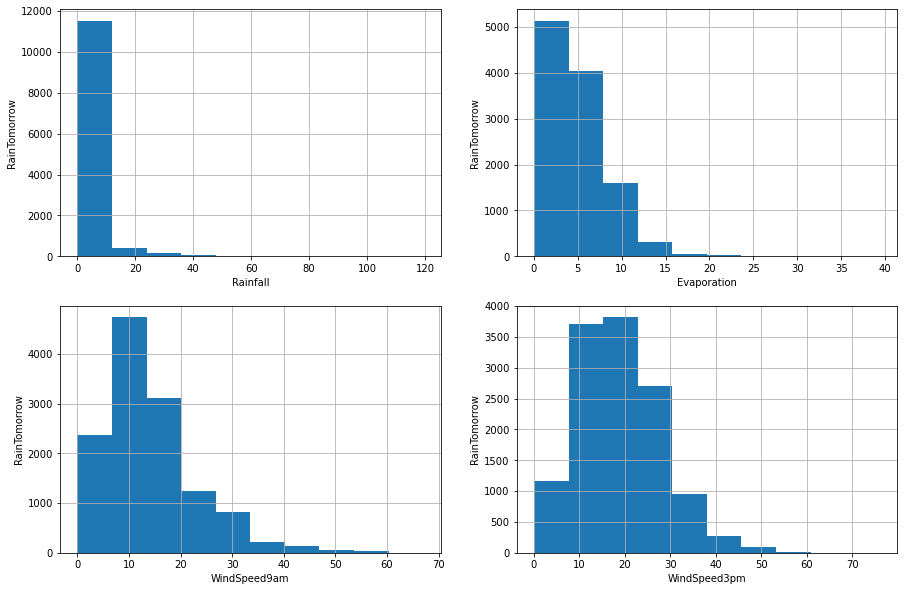

time: 1 s (started: 2021-04-17 23:30:51 +08:00)


In [135]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')



Text(0, 0.5, 'RainTomorrow')

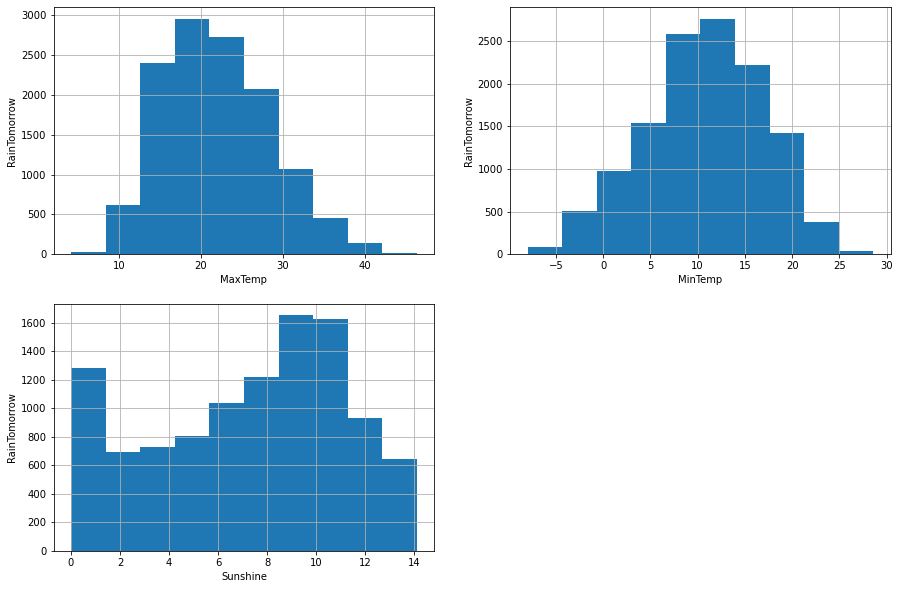

time: 938 ms (started: 2021-04-17 23:30:52 +08:00)


In [136]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.MaxTemp.hist(bins=10)
fig.set_xlabel('MaxTemp')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = data.MinTemp.hist(bins=10)
fig.set_xlabel('MinTemp')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = data.Sunshine.hist(bins=10)
fig.set_xlabel('Sunshine')
fig.set_ylabel('RainTomorrow')

### Exploring Class Distribution

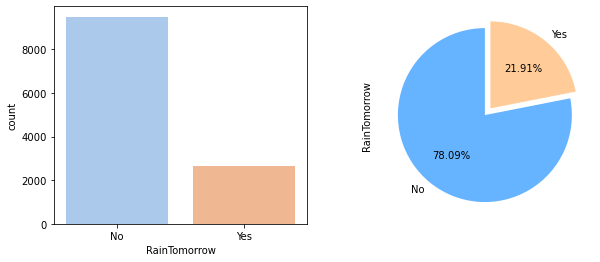

time: 344 ms (started: 2021-04-17 23:30:53 +08:00)


In [137]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(10,4))
labels=['No', 'Yes']
sns.countplot(x=data.RainTomorrow, data=data, palette="pastel",ax=ax[0])
data['RainTomorrow'].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66b3ff','#ffcc99'], 
                                             labels=labels, explode = (0, 0.1), startangle=90)
plt.show()

### Exploring Locations

In [138]:
# print number of labels in Location variable
print('Location contains', len(data.Location.unique()), 'labels')

# check labels in location variable
data.Location.unique()

# check frequency distribution of values in Location variable
data.Location.value_counts()

Location contains 4 labels


Canberra      3436
Sydney        3344
Melbourne     3193
WaggaWagga    3009
Name: Location, dtype: int64

time: 15 ms (started: 2021-04-17 23:30:54 +08:00)


[Text(0.5, 1.0, 'Year, Location Vs Rainfall'), Text(0, 0.5, 'Rainfall (mm)')]

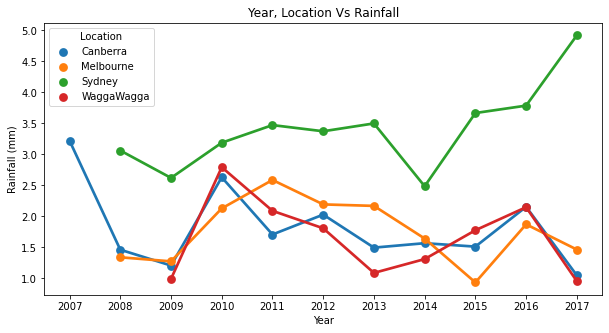

time: 828 ms (started: 2021-04-17 23:30:54 +08:00)


In [139]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['Rainfall'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['Rainfall'],hue=houragg['Location']).set(title='Year, Location Vs Rainfall', ylabel = 'Rainfall (mm)')


[Text(0.5, 1.0, 'Year, Location Vs Minimum Temperature'),
 Text(0, 0.5, 'Minimum Temperature(°C)')]

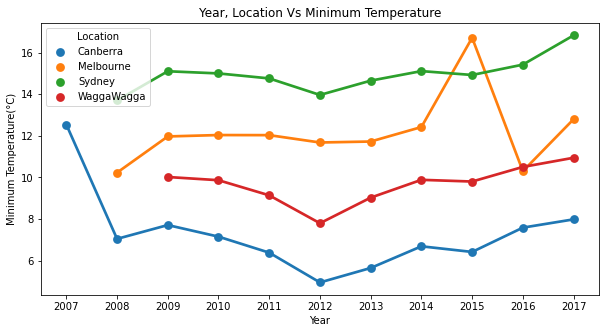

time: 859 ms (started: 2021-04-17 23:30:55 +08:00)


In [140]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['MinTemp'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['MinTemp'],hue=houragg['Location']).set(title='Year, Location Vs Minimum Temperature', ylabel = 'Minimum Temperature(°C)')


[Text(0.5, 1.0, 'Year, Location Vs Maximum Temperature'),
 Text(0, 0.5, 'Maximum Temperature(°C)')]

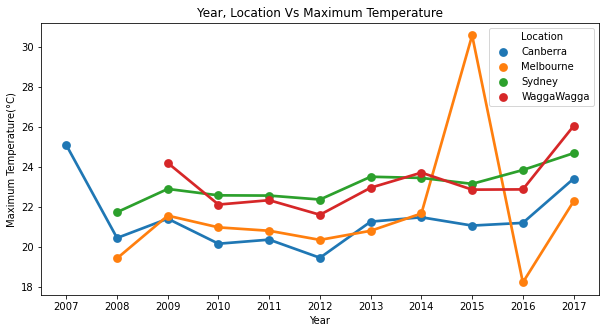

time: 750 ms (started: 2021-04-17 23:30:55 +08:00)


In [141]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['MaxTemp'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['MaxTemp'],hue=houragg['Location']).set(title='Year, Location Vs Maximum Temperature', ylabel = 'Maximum Temperature(°C)')


[Text(0.5, 1.0, 'Year, Location Vs Evaporation'),
 Text(0, 0.5, 'Evaporation (mm)')]

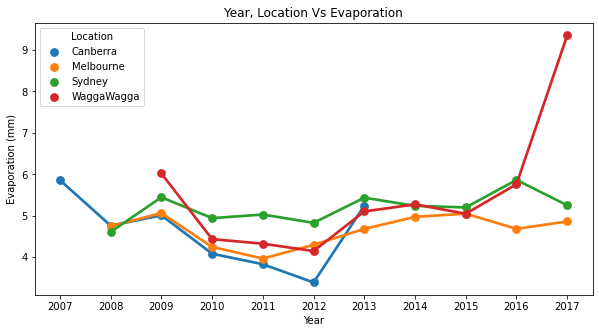

time: 782 ms (started: 2021-04-17 23:30:56 +08:00)


In [142]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['Evaporation'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['Evaporation'],hue=houragg['Location']).set(title='Year, Location Vs Evaporation', ylabel = 'Evaporation (mm)')


[Text(0.5, 1.0, 'Year, Location Vs Sunshine')]

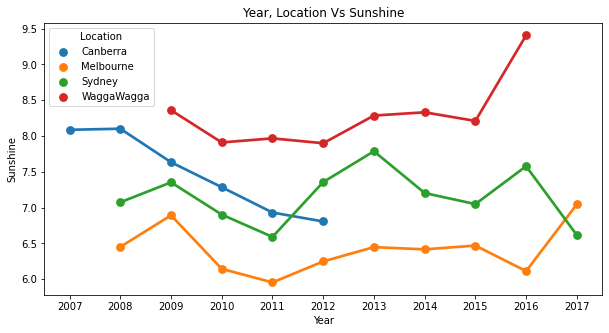

time: 781 ms (started: 2021-04-17 23:30:57 +08:00)


In [143]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['Sunshine'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['Sunshine'],hue=houragg['Location']).set(title='Year, Location Vs Sunshine')


### Multivariate Analysis

**Heatmap**

<AxesSubplot:>

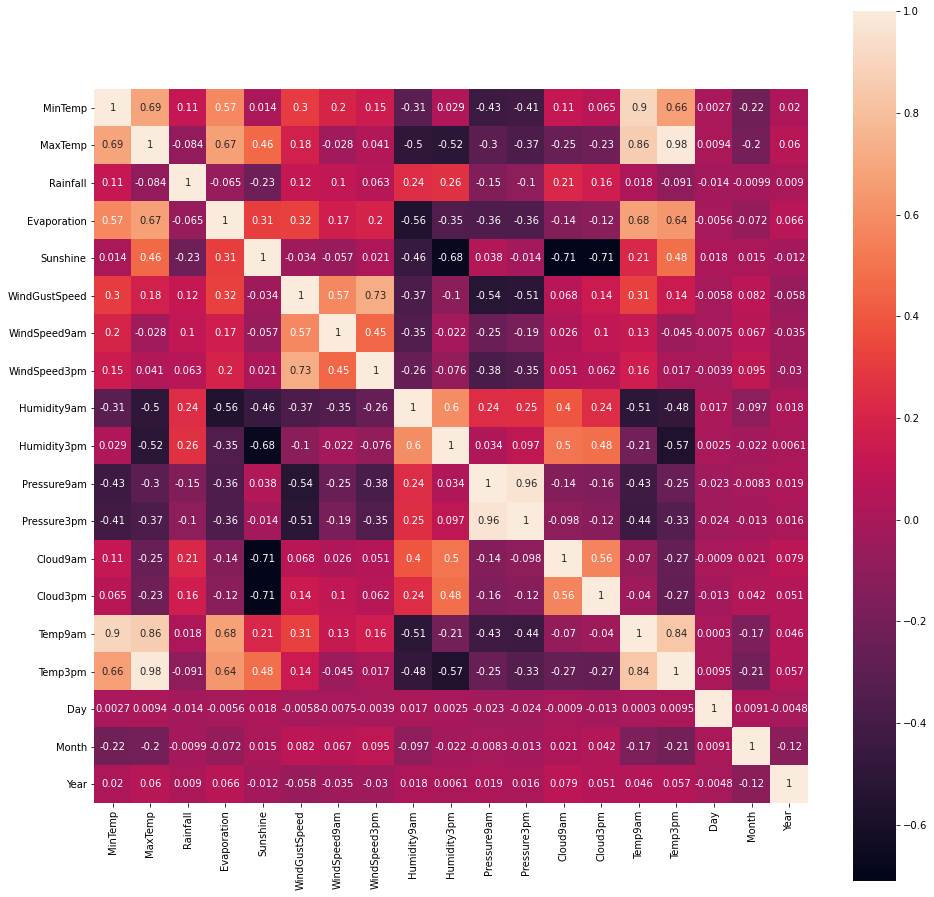

time: 7.8 s (started: 2021-04-17 23:30:58 +08:00)


In [144]:
corrmat = data.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corrmat,annot=True, square=True)

**From the above correlation heat map, we can conclude that:**

- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

In [145]:
# Calculate the correlation values
feature_cols = [var for var in data.columns if var != 'RainTomorrow']

corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
31,MaxTemp,Temp3pm,0.983102,0.983102
135,Pressure9am,Pressure3pm,0.962644,0.962644
13,MinTemp,Temp9am,0.902728,0.902728
30,MaxTemp,Temp9am,0.863468,0.863468
161,Temp9am,Temp3pm,0.836368,0.836368


time: 62 ms (started: 2021-04-17 23:31:06 +08:00)


In [146]:
# Drop columns with correlation higher than 0.95
data = data.drop(['Temp3pm', 'Pressure3pm'], axis=1)

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [147]:
#update numerical variable list
numerical = [var for var in data.columns if data[var].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Day',
 'Month',
 'Year']

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


**Pairplot**

In [148]:
#num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
#vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation','WindGustSpeed', 'WindSpeed3pm'), 
# sns.pairplot(data=data, kind='scatter', diag_kind='hist', hue='RainTomorrow')
# plt.show()

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


### Checking for Duplicates

In [149]:
data.duplicated().sum()

0

time: 16 ms (started: 2021-04-17 23:31:06 +08:00)


## Preparing features and target

In [150]:
X = data.drop(['RainTomorrow'], axis=1)

y = data['RainTomorrow']

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


## Splitting data into training and testing sets

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [152]:
X_train.shape, X_test.shape

((10385, 22), (2597, 22))

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


## Handling Missing Values

### Impute Missing Values in Categorical Variables

In [153]:
categorical_features = [var for var in categorical if var != 'RainTomorrow']
target = 'RainTomorrow'

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [154]:
X_train[categorical_features].isnull().sum()

Location          0
WindGustDir    1123
WindDir9am      614
WindDir3pm      221
RainToday       626
dtype: int64

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [155]:
y_train.isnull().sum()

639

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [156]:
X_test[categorical_features].isnull().sum()

Location         0
WindGustDir    296
WindDir9am     152
WindDir3pm      67
RainToday      190
dtype: int64

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [157]:
y_test.isnull().sum()

177

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [158]:
cat_missing = data[categorical_features].columns[data[categorical_features].isnull().any()].tolist()
cat_missing

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

time: 15 ms (started: 2021-04-17 23:31:06 +08:00)


Replace the missing values of 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' and 'RainTomorrow' with mode.

Modes of categorical features:

In [159]:
for m in cat_missing:
  print(m, '\t', X_train[m].mode()[0])

WindGustDir 	 N
WindDir9am 	 W
WindDir3pm 	 WNW
RainToday 	 No
time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


Mode of target:

In [160]:
y_train.mode()[0]

'No'

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [161]:
for m in cat_missing:
  X_train[m].fillna(X_train[m].mode()[0], inplace=True)
  X_test[m].fillna(X_train[m].mode()[0], inplace=True)

time: 16 ms (started: 2021-04-17 23:31:06 +08:00)


In [162]:
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_train.mode()[0], inplace=True)

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


Check whether all missing values for categorical variables have been removed.

In [163]:
X_train[categorical_features].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [164]:
y_train.isnull().sum()

0

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [165]:
X_test[categorical_features].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [166]:
y_test.isnull().sum()

0

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


### Impute Missing Values in Numerical Variables

In [167]:
X_train[numerical].isnull().sum()

MinTemp           381
MaxTemp           378
Rainfall          626
Evaporation      1449
Sunshine         1901
WindGustSpeed    1122
WindSpeed9am      207
WindSpeed3pm      197
Humidity9am       438
Humidity3pm       397
Pressure9am       568
Cloud9am         2282
Cloud3pm         2443
Temp9am           392
Day                 0
Month               0
Year                0
dtype: int64

time: 15 ms (started: 2021-04-17 23:31:06 +08:00)


In [168]:
X_test[numerical].isnull().sum()

MinTemp          109
MaxTemp          108
Rainfall         190
Evaporation      347
Sunshine         465
WindGustSpeed    295
WindSpeed9am      50
WindSpeed3pm      52
Humidity9am      125
Humidity3pm      115
Pressure9am      159
Cloud9am         615
Cloud3pm         662
Temp9am          112
Day                0
Month              0
Year               0
dtype: int64

time: 0 ns (started: 2021-04-17 23:31:06 +08:00)


In [169]:
num_missing = data[numerical].columns[data[numerical].isnull().any()].tolist()
num_missing

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am']

time: 16 ms (started: 2021-04-17 23:31:06 +08:00)


Replace the missing values for the above numerical variables with median.

Medians of numerical variables:

In [170]:
for m in num_missing:
  print(m, '\t', X_train[m].median())

MinTemp 	 10.9
MaxTemp 	 21.4
Rainfall 	 0.0
Evaporation 	 4.0
Sunshine 	 7.9
WindGustSpeed 	 39.0
WindSpeed9am 	 13.0
WindSpeed3pm 	 19.0
Humidity9am 	 70.0
Humidity3pm 	 48.0
Pressure9am 	 1018.5
Cloud9am 	 5.0
Cloud3pm 	 5.0
Temp9am 	 14.9
time: 15 ms (started: 2021-04-17 23:31:06 +08:00)


In [171]:
for m in num_missing:
  X_train[m].fillna(X_train[m].median(), inplace=True)
  X_test[m].fillna(X_train[m].median(), inplace=True)

time: 15 ms (started: 2021-04-17 23:31:06 +08:00)


Check whether all missing values for numerical variables have been removed.

In [172]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Day              0
Month            0
Year             0
dtype: int64

time: 16 ms (started: 2021-04-17 23:31:06 +08:00)


In [173]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Day              0
Month            0
Year             0
dtype: int64

time: 15 ms (started: 2021-04-17 23:31:06 +08:00)


## Engineering Outliers

**Outlier cleaning for training data**

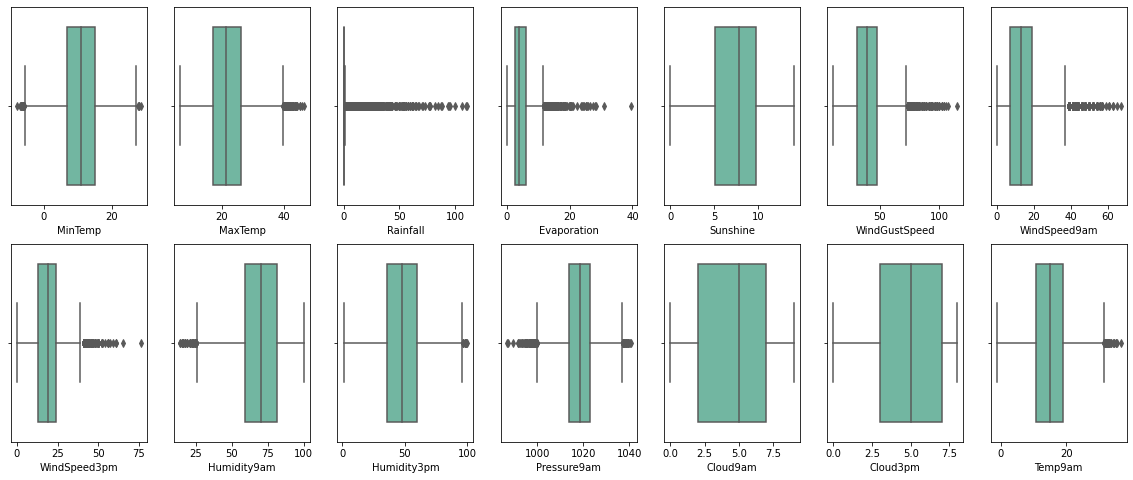

time: 1.61 s (started: 2021-04-17 23:31:06 +08:00)


In [174]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=7, figsize=(20,8))
    for i in range(2):
        for j in range(7):
            sns.boxplot(x = df[columns[count]], palette="Set2",ax=ax[i][j])
            count = count+1
boxplot_for_outlier(X_train, numerical)

In [175]:
lower_and_upper={}
X_train_outlier = X_train.copy()

for col in numerical:
    if(col=="Rainfall"): 
        sparse_value = X_train[col].mode()[0]
        nonsparse_data = pd.DataFrame(X_train[X_train[col] != sparse_value][col])
        q1=nonsparse_data[col].describe()[4]
        q3=nonsparse_data[col].describe()[6]
        iqr=q3-q1
        lowerbound = q1 - (1.5*iqr)
        upperbound = q3 + (1.5*iqr)
        lower_and_upper[col]=(lowerbound,upperbound)
        nonsparse_data.loc[(nonsparse_data.loc[:,col]<lowerbound),col] =  lowerbound*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,col]>upperbound),col] =  upperbound*1.25
        X_train_outlier[col][nonsparse_data.index]=nonsparse_data[col]
        
    else:
        q1=X_train_outlier[col].describe()[4]
        q3=X_train_outlier[col].describe()[6]
        iqr=q3-q1
        lowerbound = q1 - (1.5 * iqr)
        upperbound = q3 + (1.5 * iqr)
        lower_and_upper[col]=(lowerbound,upperbound)
        number_of_outlier = X_train_outlier.loc[(X_train_outlier.loc[:,col]<lowerbound)\
                                                           | (X_train_outlier.loc[:,col]>upperbound)].shape[0]
        if(number_of_outlier>0):
            print(number_of_outlier," outlier values cleared in" ,col)
            X_train_outlier.loc[(X_train_outlier.loc[:,col]<lowerbound),col] =  lowerbound*0.75
            X_train_outlier.loc[(X_train_outlier.loc[:,col]>upperbound),col] =  upperbound*1.25

19  outlier values cleared in MinTemp
72  outlier values cleared in MaxTemp
339  outlier values cleared in Evaporation
291  outlier values cleared in WindGustSpeed
228  outlier values cleared in WindSpeed9am
209  outlier values cleared in WindSpeed3pm
65  outlier values cleared in Humidity9am
14  outlier values cleared in Humidity3pm
110  outlier values cleared in Pressure9am
33  outlier values cleared in Temp9am
time: 156 ms (started: 2021-04-17 23:31:08 +08:00)


**Outlier cleaning for testing data**




In [176]:
X_test_outlier = X_test.copy()

for col in numerical:
    if(col =="Rainfall"):
        sparse_value = X_test[col].mode()[0]
        nonsparse_data = pd.DataFrame(X_test[X_test[col] != sparse_value][col])
        nonsparse_data.loc[(nonsparse_data.loc[:,col]<lower_and_upper[col][0]),col] =  lower_and_upper[col][0]*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,col]>lower_and_upper[col][1]),col] =  lower_and_upper[col][1]*1.25
        X_test_outlier[col][nonsparse_data.index]=nonsparse_data[col]
        
    else:
        
        number_of_outlier_test = X_test_outlier.loc[(X_test_outlier.loc[:,col]<lower_and_upper[col][0]) |\
                                                    (X_test_outlier.loc[:,col]>lower_and_upper[col][1])].shape[0]
        if(number_of_outlier_test>0):
            print(number_of_outlier_test," outlier values cleared in" ,col)
            X_test_outlier.loc[(X_test_outlier.loc[:,col]<lower_and_upper[col][0]),col] =  lower_and_upper[col][0]*0.75
            X_test_outlier.loc[(X_test_outlier.loc[:,col]>lower_and_upper[col][1]),col] =  lower_and_upper[col][1]*1.25

8  outlier values cleared in MinTemp
16  outlier values cleared in MaxTemp
86  outlier values cleared in Evaporation
61  outlier values cleared in WindGustSpeed
59  outlier values cleared in WindSpeed9am
47  outlier values cleared in WindSpeed3pm
25  outlier values cleared in Humidity9am
5  outlier values cleared in Humidity3pm
27  outlier values cleared in Pressure9am
3  outlier values cleared in Temp9am
time: 47 ms (started: 2021-04-17 23:31:08 +08:00)


**Visualization after cleaning outliers**

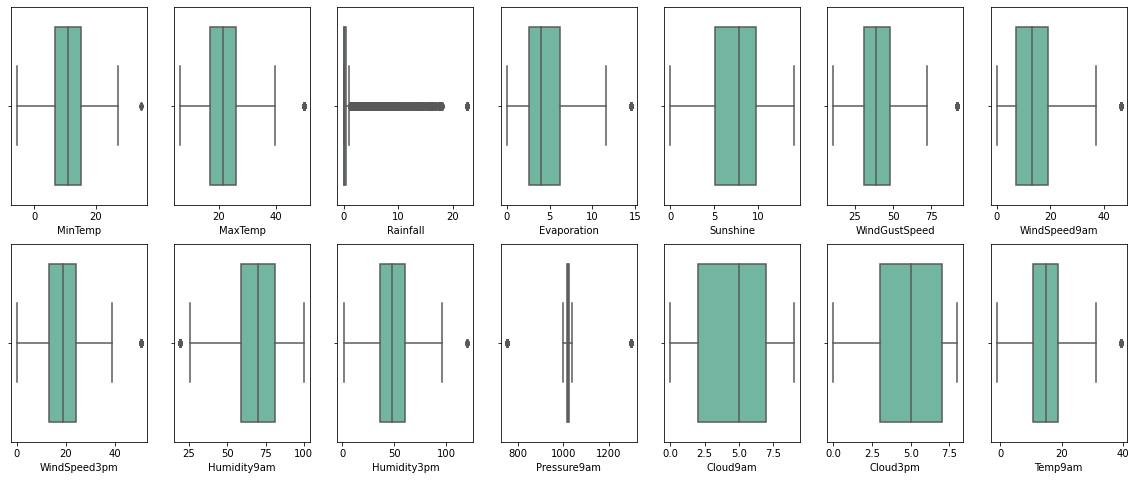

time: 1.59 s (started: 2021-04-17 23:31:08 +08:00)


In [177]:
boxplot_for_outlier(X_train_outlier, numerical)

In [178]:
X_test[numerical] = X_test_outlier[numerical]
X_train[numerical] = X_train_outlier[numerical]
pd.options.mode.chained_assignment = None

time: 16 ms (started: 2021-04-17 23:31:10 +08:00)


## Data Encoding

###Encoding on Binary Data (RainToday)

In [179]:
#Binary Encoder for RainToday, and RainTomorrow
#Onehotencoding for categorical data

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
onehotencoder = preprocessing.OneHotEncoder()

X_train['RainToday'] = lb.fit_transform(X_train['RainToday'])
X_test['RainToday'] = lb.transform(X_test['RainToday'])

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

time: 62 ms (started: 2021-04-17 23:31:10 +08:00)


###Encoding on Categorical Data

In [180]:
# Encoding on train data
X_train['Location'] = pd.Categorical(X_train['Location'])
datasetDummies_Location = pd.get_dummies(X_train['Location'], prefix = 'Location_encoded')
X_train.drop("Location", axis=1, inplace=True)
X_train = pd.concat([X_train, datasetDummies_Location], axis=1)

X_train['WindGustDir'] = pd.Categorical(X_train['WindGustDir'])
datasetDummies_WindGustDir = pd.get_dummies(X_train['WindGustDir'], prefix = 'WindGustDir_encoded')
X_train.drop("WindGustDir", axis=1, inplace=True)
X_train = pd.concat([X_train, datasetDummies_WindGustDir], axis=1)

X_train['WindDir9am'] = pd.Categorical(X_train['WindDir9am'])
datasetDummies_WindDir9am = pd.get_dummies(X_train['WindDir9am'], prefix = 'WindDir9am_encoded')
X_train.drop("WindDir9am", axis=1, inplace=True)
X_train = pd.concat([X_train, datasetDummies_WindDir9am], axis=1)

X_train['WindDir3pm'] = pd.Categorical(X_train['WindDir3pm'])
datasetDummies_WindDir3pm = pd.get_dummies(X_train['WindDir3pm'], prefix = 'WindDir3pm_encoded')
X_train.drop("WindDir3pm", axis=1, inplace=True)
X_train = pd.concat([X_train, datasetDummies_WindDir3pm], axis=1)

# Encoding on test data
X_test['Location'] = pd.Categorical(X_test['Location'])
datasetDummies_Location = pd.get_dummies(X_test['Location'], prefix = 'Location_encoded')
X_test.drop("Location", axis=1, inplace=True)
X_test = pd.concat([X_test, datasetDummies_Location], axis=1)

X_test['WindGustDir'] = pd.Categorical(X_test['WindGustDir'])
datasetDummies_WindGustDir = pd.get_dummies(X_test['WindGustDir'], prefix = 'WindGustDir_encoded')
X_test.drop("WindGustDir", axis=1, inplace=True)
X_test = pd.concat([X_test, datasetDummies_WindGustDir], axis=1)

X_test['WindDir9am'] = pd.Categorical(X_test['WindDir9am'])
datasetDummies_WindDir9am = pd.get_dummies(X_test['WindDir9am'], prefix = 'WindDir9am_encoded')
X_test.drop("WindDir9am", axis=1, inplace=True)
X_test = pd.concat([X_test, datasetDummies_WindDir9am], axis=1)

X_test['WindDir3pm'] = pd.Categorical(X_test['WindDir3pm'])
datasetDummies_WindDir3pm = pd.get_dummies(X_test['WindDir3pm'], prefix = 'WindDir3pm_encoded')
X_test.drop("WindDir3pm", axis=1, inplace=True)
X_test = pd.concat([X_test, datasetDummies_WindDir3pm], axis=1)

time: 47 ms (started: 2021-04-17 23:31:10 +08:00)


In [181]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
6353,10.0,28.4,0.6,4.0,7.9,26.0,9.0,9.0,86.0,36.0,...,0,0,0,0,0,0,1,0,0,0
12621,10.3,11.7,0.0,3.2,0.8,63.0,24.0,24.0,67.0,72.0,...,0,0,0,0,0,0,0,0,0,0
12189,10.9,21.4,0.0,2.6,0.0,37.0,0.0,13.0,70.0,48.0,...,0,0,0,0,0,0,0,0,0,1
4779,5.8,27.3,0.0,9.0,10.1,54.0,17.0,33.0,36.0,21.0,...,0,0,0,0,0,0,0,0,1,0
9098,5.0,14.2,0.0,0.6,4.8,48.0,20.0,19.0,46.0,46.0,...,0,0,0,0,0,0,0,0,1,0


time: 15 ms (started: 2021-04-17 23:31:10 +08:00)


In [182]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
10828,7.7,16.3,0.0,3.0,8.4,61.0,20.0,22.0,59.0,33.0,...,0,1,0,0,0,0,0,0,0,0
9876,14.7,28.2,0.0,10.0,9.1,63.0,35.0,28.0,41.0,13.0,...,0,1,0,0,0,0,0,0,0,0
2263,1.6,16.5,0.0,0.8,9.0,30.0,15.0,11.0,71.0,46.0,...,0,0,0,0,0,0,0,0,0,0
11079,15.6,21.9,0.0,8.6,5.6,41.0,15.0,24.0,75.0,71.0,...,0,0,1,0,0,0,0,0,0,0
12497,10.9,21.4,0.0,6.2,6.3,33.0,19.0,17.0,70.0,48.0,...,0,0,0,0,1,0,0,0,0,0


time: 31 ms (started: 2021-04-17 23:31:10 +08:00)


## Feature Scaling

In [183]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,...,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000
mean,10.701270,21.972874,1.771714,4.755128,7.322985,41.038577,14.378045,19.297412,69.524266,48.676553,...,0.067212,0.077997,0.083678,0.038421,0.061531,0.050169,0.043524,0.073375,0.105537,0.064998
std,6.176431,6.628597,4.667934,3.076957,3.531044,14.679347,9.253976,9.174109,15.726469,18.412796,...,0.250401,0.268180,0.276918,0.192219,0.240313,0.218303,0.204044,0.260764,0.307259,0.246533
min,-5.600000,6.600000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,19.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.800000,17.000000,0.000000,2.600000,5.100000,31.000000,7.000000,13.000000,59.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.900000,21.400000,0.000000,4.000000,7.900000,39.000000,13.000000,19.000000,70.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.100000,26.100000,0.400000,6.200000,9.800000,48.000000,19.000000,24.000000,81.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.437500,49.687500,22.625000,14.500000,14.100000,91.875000,46.250000,50.625000,100.000000,120.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 219 ms (started: 2021-04-17 23:31:10 +08:00)


In [184]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,...,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000
mean,10.873729,22.117905,1.563342,4.853831,7.426146,41.300876,14.407682,19.493791,68.696765,48.216018,...,0.060454,0.075472,0.085868,0.037736,0.061610,0.046592,0.034270,0.073161,0.112822,0.069311
std,6.196932,6.634837,4.332540,3.120053,3.530939,14.190335,9.376890,9.098532,15.754930,17.752599,...,0.238373,0.264202,0.280223,0.190593,0.240491,0.210804,0.181958,0.260451,0.316437,0.254031
min,-5.500000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,19.500000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.200000,17.200000,0.000000,2.600000,5.400000,31.000000,7.000000,13.000000,59.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.900000,21.400000,0.000000,4.000000,7.900000,39.000000,13.000000,19.000000,70.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.100000,26.300000,0.400000,6.600000,9.900000,48.000000,19.000000,24.000000,80.000000,59.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.437500,49.687500,22.625000,14.500000,14.000000,91.875000,46.250000,50.625000,100.000000,120.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 203 ms (started: 2021-04-17 23:31:10 +08:00)


Feature scaling is for mapping all the feature variables onto the same scale.

In [185]:
cols = X_train.columns

time: 0 ns (started: 2021-04-17 23:31:10 +08:00)


In [186]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

time: 31 ms (started: 2021-04-17 23:31:10 +08:00)


In [187]:
X_train = pd.DataFrame(X_train, columns=[cols])

time: 0 ns (started: 2021-04-17 23:31:10 +08:00)


In [188]:
X_test = pd.DataFrame(X_test, columns=[cols])

time: 0 ns (started: 2021-04-17 23:31:11 +08:00)


In [189]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,...,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000
mean,0.407150,0.356783,0.078308,0.327940,0.519361,0.371420,0.310877,0.381183,0.621419,0.400643,...,0.067212,0.077997,0.083678,0.038421,0.061531,0.050169,0.043524,0.073375,0.105537,0.064998
std,0.154266,0.153840,0.206318,0.212204,0.250429,0.181507,0.200086,0.181217,0.195360,0.154729,...,0.250401,0.268180,0.276918,0.192219,0.240313,0.218303,0.204044,0.260764,0.307259,0.246533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309710,0.241369,0.000000,0.179310,0.361702,0.247295,0.151351,0.256790,0.490683,0.294118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.412114,0.343487,0.000000,0.275862,0.560284,0.346213,0.281081,0.375309,0.627329,0.394958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.517015,0.452567,0.017680,0.427586,0.695035,0.457496,0.410811,0.474074,0.763975,0.495798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 266 ms (started: 2021-04-17 23:31:11 +08:00)


In [190]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,...,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000
mean,0.411457,0.360149,0.069098,0.334747,0.526677,0.374663,0.311517,0.385063,0.611140,0.396773,...,0.060454,0.075472,0.085868,0.037736,0.061610,0.046592,0.034270,0.073161,0.112822,0.069311
std,0.154778,0.153985,0.191493,0.215176,0.250421,0.175460,0.202744,0.179724,0.195713,0.149182,...,0.238373,0.264202,0.280223,0.190593,0.240491,0.210804,0.181958,0.260451,0.316437,0.254031
min,0.002498,-0.058021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033613,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319700,0.246011,0.000000,0.179310,0.382979,0.247295,0.151351,0.256790,0.490683,0.294118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.412114,0.343487,0.000000,0.275862,0.560284,0.346213,0.281081,0.375309,0.627329,0.394958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.517015,0.457209,0.017680,0.455172,0.702128,0.457496,0.410811,0.474074,0.751553,0.487395,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.992908,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 250 ms (started: 2021-04-17 23:31:11 +08:00)


## Training Baseline Models

The evaluation metrics for classification problems available from sklearn.metrics include accuracy_score, precision_score, recall_score, f1_score and roc_auc_score.

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#from sklearn.metrics import confusion_matrix, classification_report

time: 0 ns (started: 2021-04-17 23:31:11 +08:00)


In [192]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, cohen_kappa_score

def evaluate_models(model_list, X_data):
  
  cv = KFold(n_splits=10, shuffle=True, random_state=42)

  scoring = {'accuracy': 'accuracy',
            'balanced_accuracy': 'balanced_accuracy',
            'precision_macro': 'precision_macro',
            'recall_macro': 'recall_macro',
            'f1_macro': 'f1_macro',
            'average_precision': 'average_precision',
            'roc_auc': 'roc_auc',
            'cohen_kappa': make_scorer(cohen_kappa_score)}

  scores_accuracy = []
  scores_balanced_accuracy = []
  scores_precision = []
  scores_recall = []
  scores_f1 = []
  scores_average_precision = []
  scores_roc_auc = []
  scores_cohen_kappa = []
  fit_time = []
  score_time = []

  for name, model in model_list:
    score = cross_validate(model, X_data, y_train, cv=cv, scoring=scoring, n_jobs=1, return_train_score=False)
    scores_accuracy.append(score['test_accuracy'].mean())
    scores_balanced_accuracy.append(score['test_balanced_accuracy'].mean())
    scores_precision.append(score['test_precision_macro'].mean())
    scores_recall.append(score['test_recall_macro'].mean())
    scores_f1.append(score['test_f1_macro'].mean())
    scores_average_precision.append(score['test_average_precision'].mean())
    scores_roc_auc.append(score['test_roc_auc'].mean())
    scores_cohen_kappa.append(score['test_cohen_kappa'].mean())
    fit_time.append(score['fit_time'].mean())
    score_time.append(score['score_time'].mean())

  performance = pd.DataFrame({
      'Model': [model[0] for model in model_list],
      'Accuracy': scores_accuracy,
      'Balanced Accuracy': scores_balanced_accuracy,
      'Precision': scores_precision,
      'Recall': scores_recall,
      'F1': scores_f1,
      'PR-AUC': scores_average_precision,
      'ROC-AUC': scores_roc_auc,
      'Cohen Kappa': scores_cohen_kappa,
      'Fit Time': fit_time,
      'Score Time': score_time
    })

  return performance

time: 0 ns (started: 2021-04-17 23:31:11 +08:00)


In [193]:
models = []
models.append(("Logistic Regression", LogisticRegression(penalty='l1', solver='liblinear', random_state=42)))
models.append(("Decision Tree Classifier", DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)))
models.append(("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto'))) 
models.append(("MLP Classifier", MLPClassifier(activation='relu', alpha=0.0001, verbose=0, random_state=42))) 
models.append(("Gaussian Naive Bayes", GaussianNB(priors=None, var_smoothing=1e-09))) 
models.append(("Bernoulli Naive Bayes", BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None))) 
models.append(("Multinomial Naive Bayes", MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None))) 
models.append(("SVC", SVC(random_state=42, probability=True)))
models.append(("SGD Classifier", SGDClassifier(learning_rate = 'optimal', random_state=42, loss='log')))
models.append(("Random Forest Classifier", RandomForestClassifier(criterion='gini', random_state=42)))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42)))
models.append(("Ada Boost Classifier", AdaBoostClassifier(n_estimators=60, learning_rate=1, random_state=42)))

time: 0 ns (started: 2021-04-17 23:31:11 +08:00)


In [194]:
pf1 = evaluate_models(models, X_train)
display(pf1)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,Logistic Regression,0.854695,0.717491,0.801395,0.717491,0.745608,0.677692,0.856513,0.495712,1.431080,0.022389
1,Decision Tree Classifier,0.787192,0.685943,0.679425,0.685943,0.682219,0.352239,0.685943,0.364713,0.185460,0.017638
2,K-Nearest Neighbors,0.795570,0.612549,0.674816,0.612549,0.627623,0.359656,0.687384,0.265685,0.319826,2.455572
3,MLP Classifier,0.831777,0.718259,0.746049,0.718259,0.729735,0.625403,0.827998,0.460429,19.544076,0.026435
4,Gaussian Naive Bayes,0.774197,0.711565,0.677473,0.711565,0.689109,0.496561,0.786164,0.381717,0.024693,0.020037
5,Bernoulli Naive Bayes,0.781995,0.633623,0.658170,0.633623,0.642711,0.453411,0.706423,0.287612,0.022149,0.022216
6,Multinomial Naive Bayes,0.813192,0.598567,0.735511,0.598567,0.614893,0.493658,0.751299,0.257426,0.014797,0.018207
7,SVC,0.857872,0.701601,0.826808,0.701601,0.737031,0.691840,0.857510,0.482430,28.331823,0.839519
8,SGD Classifier,0.848436,0.706564,0.799093,0.706564,0.732583,0.672982,0.853328,0.471682,0.143290,0.019994
9,Random Forest Classifier,0.854888,0.701413,0.814834,0.701413,0.734720,0.686875,0.864465,0.477016,1.901157,0.103006


time: 10min 20s (started: 2021-04-17 23:31:11 +08:00)


## Feature Selection

In [195]:
# from sklearn.feature_selection import RFECV

# X_trainlist = []

# for n in range(len(models)):

#   rfecv = RFECV(estimator=models[n][1], step=1, cv=5, scoring='accuracy')

#   rfecv = rfecv.fit(X_train, y_train)

#   print("Optimal number of features : %d" % rfecv.n_features_)



time: 0 ns (started: 2021-04-17 23:41:32 +08:00)


In [196]:
from sklearn.decomposition import PCA

pca = PCA(n_components=69)
X_trainNew = pca.fit_transform(X_train)

print(pd.DataFrame(pca.components_, columns=X_train.columns))
print("\nExplained variance by each component: %s" % pca.explained_variance_ratio_)


         MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
0   7.402732e-02 -3.776100e-02  6.298935e-02 -1.720853e-02 -1.599877e-01   
1   9.489682e-02  4.221620e-02  3.234093e-02  3.794741e-02  3.999562e-02   
2  -7.305858e-02 -6.761789e-02  5.800507e-02 -8.991682e-02 -6.774770e-02   
3   9.243943e-04 -1.032499e-01  2.512354e-01 -1.156510e-01 -2.477098e-01   
4  -6.602175e-02 -5.243036e-02  8.787727e-02 -7.788263e-02 -9.889253e-02   
..           ...           ...           ...           ...           ...   
64 -6.551599e-01  6.247334e-01 -1.089793e-02  8.943531e-03 -1.936364e-02   
65 -4.081812e-01 -3.921915e-01 -2.741965e-03  1.219039e-02  7.398862e-03   
66 -1.185852e-15 -1.872862e-16 -1.179541e-16  1.150392e-16 -3.572282e-16   
67  0.000000e+00 -3.254932e-16  8.941957e-17 -2.875069e-17  1.118122e-16   
68  0.000000e+00  1.443958e-16  8.227241e-17 -1.215402e-16 -3.643473e-17   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  ...  \
0   9.

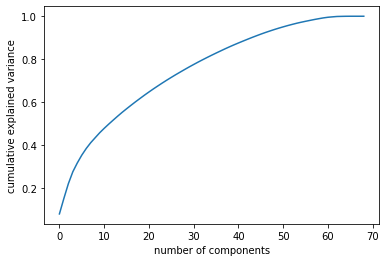

time: 297 ms (started: 2021-04-17 23:41:32 +08:00)


In [197]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [198]:
pf2 = evaluate_models(models, X_trainNew)
display (pf2)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,Logistic Regression,0.854117,0.716834,0.800388,0.716834,0.744632,0.677508,0.856178,0.493837,0.092198,0.015095
1,Decision Tree Classifier,0.766201,0.651211,0.647830,0.651211,0.649089,0.313830,0.651211,0.298520,1.520427,0.012156
2,K-Nearest Neighbors,0.795570,0.612549,0.674816,0.612549,0.627623,0.359656,0.687384,0.265685,0.221028,2.544683
3,MLP Classifier,0.836496,0.730010,0.753024,0.730010,0.740025,0.625274,0.822928,0.480631,18.473481,0.020256
4,Gaussian Naive Bayes,0.819066,0.676119,0.724940,0.676119,0.693455,0.518883,0.795501,0.390268,0.018498,0.014195
5,Bernoulli Naive Bayes,0.823302,0.623811,0.760231,0.623811,0.647283,0.551833,0.785613,0.315276,0.028289,0.018820
6,Multinomial Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007898,0.000000
7,SVC,0.857005,0.703702,0.821177,0.703702,0.737946,0.684492,0.853081,0.483557,29.517050,0.843056
8,SGD Classifier,0.854599,0.720464,0.799715,0.720464,0.747312,0.675089,0.854417,0.498782,0.126547,0.013950
9,Random Forest Classifier,0.845643,0.658244,0.830989,0.658244,0.692410,0.654265,0.838962,0.402656,9.798499,0.094726


time: 17min 45s (started: 2021-04-17 23:41:33 +08:00)


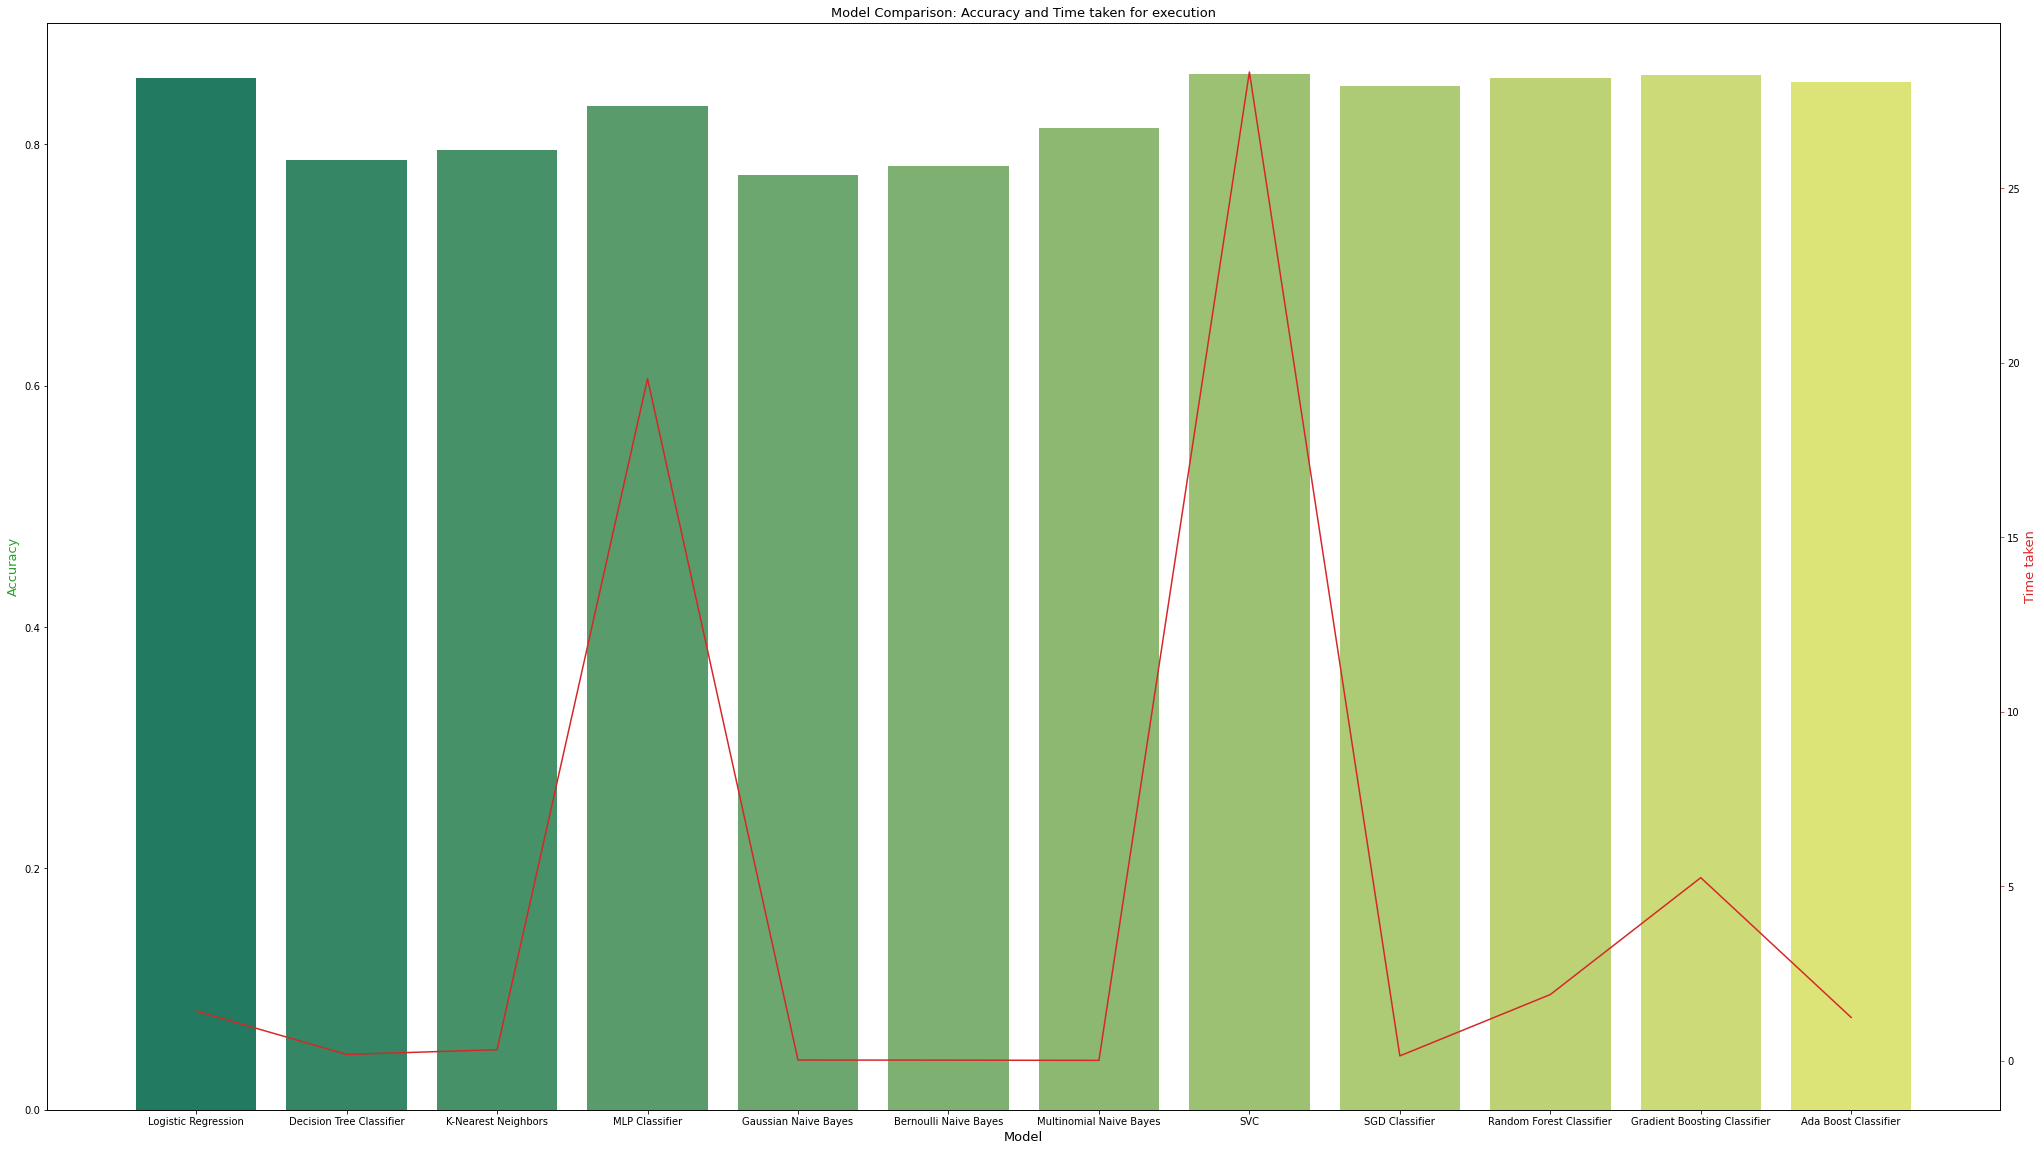

time: 984 ms (started: 2021-04-17 23:59:18 +08:00)


In [199]:
accuracy_scores = pf1['Accuracy']
roc_auc_scores = pf1['ROC-AUC']
coh_kap_scores = pf1['Cohen Kappa']
tt = pf1['Fit Time']

model_data = {'Model': ['Logistic Regression','Decision Tree Classifier','K-Nearest Neighbors',
                        'MLP Classifier','Gaussian Naive Bayes','Bernoulli Naive Bayes',
                        'Multinomial Naive Bayes', 'SVC', 'SGD Classifier',
                        'Random Forest Classifier', 'Gradient Boosting Classifier', 'Ada Boost Classifier'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(35,20))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Accuracy', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Time taken', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

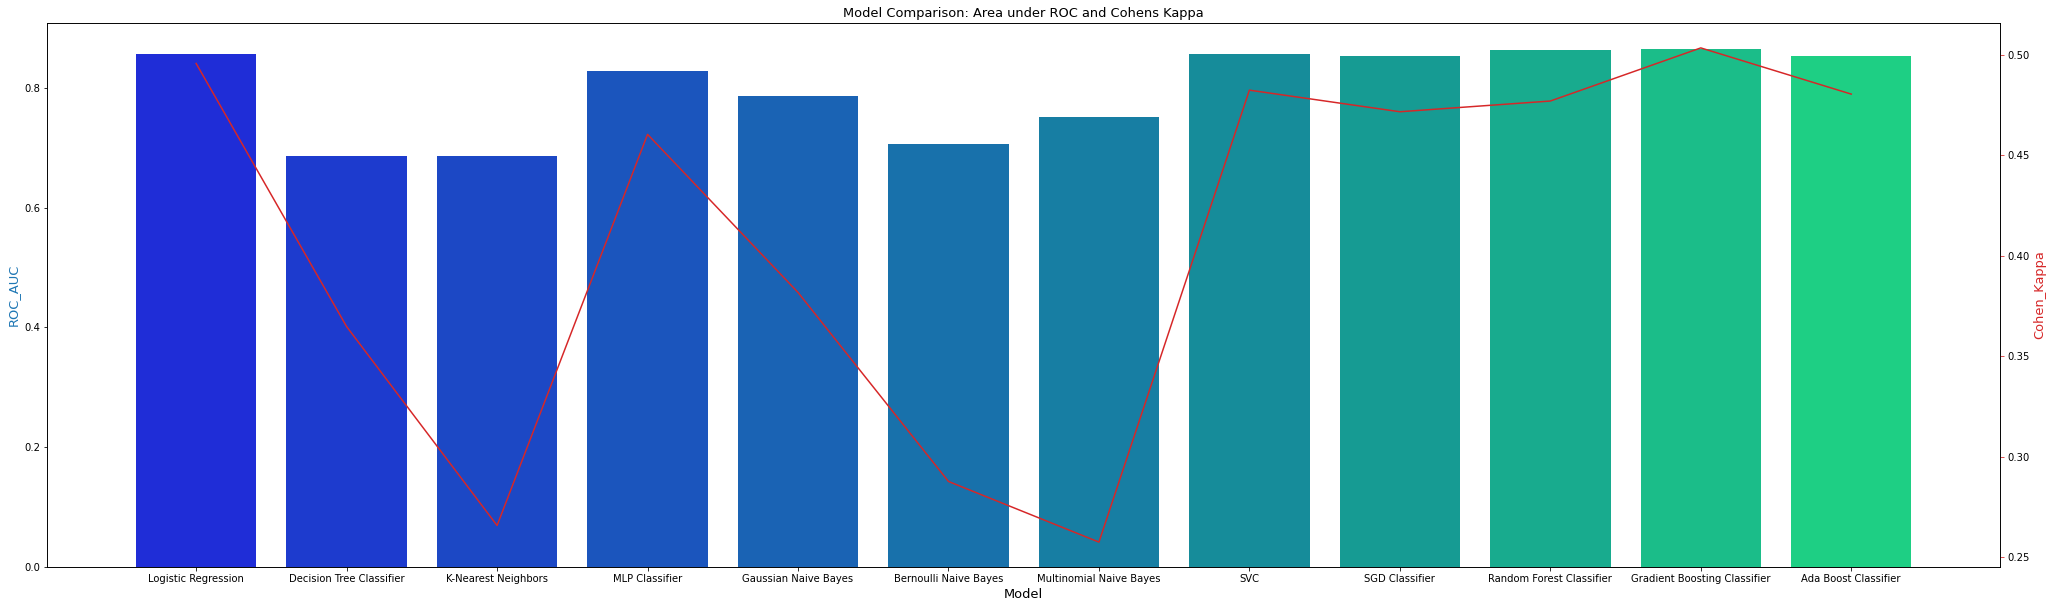

time: 672 ms (started: 2021-04-17 23:59:19 +08:00)


In [200]:
fig, ax3 = plt.subplots(figsize=(35,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

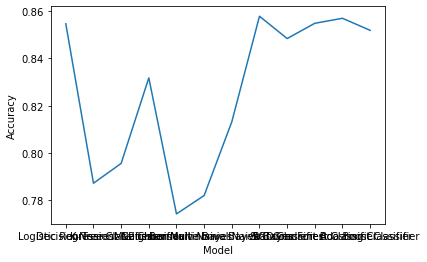

time: 360 ms (started: 2021-04-17 23:59:20 +08:00)


In [201]:
sns.lineplot(data=pf1, x="Model", y="Accuracy", sort=True)

In [202]:
# from numpy import interp
# from sklearn.metrics import auc, average_precision_score, roc_curve, precision_recall_curve
# from sklearn.model_selection import KFold

# %matplotlib inline

# def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    
#     # Creating ROC Curve with Cross Validation
#     tprs = []
#     aucs = []
#     mean_fpr = np.linspace(0, 1, 100)

#     plt.figure(figsize=(7 , 5))

#     i = 0
#     for train, test in cv.split(X, y):
#         probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
#         # Compute ROC curve and area the curve
#         fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
#         tprs.append(interp(mean_fpr, fpr, tpr))

#         tprs[-1][0] = 0.0
#         roc_auc = auc(fpr, tpr)
#         aucs.append(roc_auc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#         i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Luck', alpha=.8) 

#     mean_tpr = np.mean(tprs, axis=0)
#     mean_tpr[-1] = 1.0

#     mean_auc = auc(mean_fpr, mean_tpr)
    
#     plt.plot(mean_fpr, mean_tpr, color='b',
#              label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
#              lw=2, alpha=.8)
    
#     plt.xlim([-0.05, 1.05])
#     plt.ylim([-0.05, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(title)
#     plt.legend(prop={'size':10}, loc="center left", bbox_to_anchor=(1, 0.5))
#     plt.show()


# def draw_cv_pr_curve(classifier, cv, X, y, title='PR Curve'):

#     y_real = []
#     y_proba = []

#     plt.figure(figsize=(7 , 5))

#     i = 0
#     for train, test in cv.split(X, y):
#         probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
#         # Compute ROC curve and area the curve
#         precision, recall, _ = precision_recall_curve(y.iloc[test], probas_[:, 1])

#         # Plotting each individual PR Curve
#         plt.plot(recall, precision, lw=1, alpha=0.3,
#                  label='PR fold %d (AUC = %0.2f)' % (i, average_precision_score(y.iloc[test], probas_[:, 1])))

#         y_real.append(y.iloc[test])
#         y_proba.append(probas_[:, 1])

#         i += 1
#     plt.plot([0, 1], [1, 0], linestyle='--', lw=2, color='r',
#              label='Luck', alpha=.8) 

#     y_real = np.concatenate(y_real)
#     y_proba = np.concatenate(y_proba)

#     precision, recall, _ = precision_recall_curve(y_real, y_proba)

#     plt.plot(recall, precision, color='b',
#              label=r'Mean PR (AUC = %0.2f)' % (average_precision_score(y_real, y_proba)),
#              lw=2, alpha=.8)

#     plt.xlim([-0.05, 1.05])
#     plt.ylim([-0.05, 1.05])
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.title(title)
#     plt.legend(prop={'size':10}, loc="center left", bbox_to_anchor=(1, 0.5))
#     plt.show()

time: 0 ns (started: 2021-04-17 23:59:20 +08:00)


In [203]:
# y_train = pd.DataFrame(y_train)

time: 0 ns (started: 2021-04-17 23:59:20 +08:00)


In [204]:
# for model in models:
#   draw_cv_roc_curve(model[1], cv, X_train, y_train, title='Cross Validated ROC for ' + model[0])

time: 0 ns (started: 2021-04-17 23:59:20 +08:00)


In [205]:
# for model in models:
#   draw_cv_pr_curve(model[1], cv, X_train, y_train, title='Cross Validated PR for ' + model[0])

time: 0 ns (started: 2021-04-17 23:59:20 +08:00)
